In [1]:
import pandas as pd 
import folium 
import matplotlib
import matplotlib.pyplot as plt
import pylab
import numpy as np

In [2]:
# 칼럼 전체보기
pd.set_option('display.max_columns', None)

In [3]:
import matplotlib.font_manager as fm

for font in fm.fontManager.ttflist:
    if font.name in ['AppleGothic', 'Malgun Gothic']:
        plt.rcParams['font.family'] = font.name
        break

plt.rcParams['font.family']

['AppleGothic']

# EDA

## 경상지역 테이블 만들기

In [61]:
shelter = pd.read_csv('전국지진해일대피소표준데이터.csv', encoding = "CP949")

In [5]:
len(shelter)

10305

In [6]:
shelter.sample()

,지진해일대피소명,지진해일대피소구분,지진해일대피소유형,지진해일대피소유형구분,소재지도로명주소,소재지지번주소,위도,경도,수용가능면적,최대수용인원수,지진해일대피소운영상태,지진해일대피소전화번호,부대편의시설,주민대피지구명,주민대피지구내가구수,주민대피지구내거주인수,주민대피지구내재해약자수,내진적용여부,내진설계등급,해안선이격거리,해발높이,지진대피안내표지판수,긴급대피장소안내표지판수,지진대피로안내표지판수,관리기관명,관리기관전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 29
2799,대전가오고등학교,지진대피소,옥외대피소,학교,대전광역시 동구 신기로 71,대전광역시 동구 가오동 427,36.310642,127.454503,4394.0,1463.0,Y,042-280-3700,NaN,가오지구,NaN,NaN,NaN,미적용,NaN,NaN,NaN,0.0,0.0,0.0,대전광역시 동구,042-251-4994,2019-09-19,3640000,대전광역시 동구,NaN


In [62]:
shelter.columns

Index(['지진해일대피소명', '지진해일대피소구분', '지진해일대피소유형', '지진해일대피소유형구분', '소재지도로명주소',
       '소재지지번주소', '위도', '경도', '수용가능면적', '최대수용인원수', '지진해일대피소운영상태',
       '지진해일대피소전화번호', '부대편의시설', '주민대피지구명', '주민대피지구내가구수', '주민대피지구내거주인수',
       '주민대피지구내재해약자수', '내진적용여부', '내진설계등급', '해안선이격거리', '해발높이', '지진대피안내표지판수',
       '긴급대피장소안내표지판수', '지진대피로안내표지판수', '관리기관명', '관리기관전화번호', '데이터기준일자', '제공기관코드',
       '제공기관명', 'Unnamed: 29'],
      dtype='object')

### 소재지도로명주소 null value 채우기 

In [8]:
shelter[shelter['소재지도로명주소'].isnull()].head()

,지진해일대피소명,지진해일대피소구분,지진해일대피소유형,지진해일대피소유형구분,소재지도로명주소,소재지지번주소,위도,경도,수용가능면적,최대수용인원수,지진해일대피소운영상태,지진해일대피소전화번호,부대편의시설,주민대피지구명,주민대피지구내가구수,주민대피지구내거주인수,주민대피지구내재해약자수,내진적용여부,내진설계등급,해안선이격거리,해발높이,지진대피안내표지판수,긴급대피장소안내표지판수,지진대피로안내표지판수,관리기관명,관리기관전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 29
1042,강하생활체육공원,지진대피소,옥외대피소,공원,NaN,경기도 양평군 강하면 운심리 57번지,37.497379,127.413071,10000.0,12121.0,Y,031-770-3091,급수+화장실+전기,별도 지구지정사항없음,NaN,NaN,NaN,미적용,NaN,NaN,32.0,1.0,0.0,0.0,강하면,031-770-3089,2019-03-01,4170000,경기도 양평군,NaN
1046,단월레포츠공원,지진대피소,옥외대피소,공원,NaN,경기도 양평군 단월면 보룡리 산 11-1,37.544436,127.670154,10000.0,12121.0,Y,031-770-3213,급수+화장실+전기,별도 지구지정사항없음,NaN,NaN,NaN,미적용,NaN,NaN,112.0,1.0,0.0,0.0,단월면,031-770-3213,2019-03-01,4170000,경기도 양평군,NaN
1052,서동공원 서문주차장,지진대피소,옥외대피소,기타,NaN,충청남도 부여군 부여읍 동남리 172-1,36.271127,126.909818,13736.0,4000.0,Y,041-830-2630,화장실,별도 지구지정사항 없음,NaN,NaN,NaN,미적용,NaN,NaN,NaN,0.0,0.0,0.0,충청남도 부여군청,041-830-2630,2018-10-01,4570000,충청남도 부여군,NaN
1098,솔터체육공원,지진대피소,옥외대피소,공원,NaN,경기도 김포시 마산동 642-1,37.640454,126.649226,193990.0,58785.0,Y,031-980-5627,NaN,솔터체육공원,NaN,NaN,NaN,미적용,NaN,NaN,NaN,NaN,NaN,NaN,김포시,031-980-2914,2019-09-10,4090000,경기도 김포시,NaN
1099,모담공원,지진대피소,옥외대피소,공원,NaN,경기도 김포시 운양동 1325-1,37.648470,126.689301,536255.0,162501.0,Y,031-980-5627,NaN,모담공원,NaN,NaN,NaN,미적용,NaN,NaN,NaN,NaN,NaN,NaN,김포시,031-980-2914,2019-09-10,4090000,경기도 김포시,NaN


In [9]:
len(shelter[shelter['소재지도로명주소'].isnull()])

926

In [10]:
len(shelter[shelter['소재지도로명주소'].isnull()&shelter['소재지지번주소'].isnull()])

0

In [11]:
len(shelter[shelter['소재지지번주소'].isnull()])

5684

#### 소재지지번주소로 부터 가져오기

In [12]:
shelter['소재지도로명주소'] = shelter['소재지도로명주소'].fillna(shelter['소재지지번주소'])

In [13]:
shelter[shelter['소재지도로명주소'].isnull()]

,지진해일대피소명,지진해일대피소구분,지진해일대피소유형,지진해일대피소유형구분,소재지도로명주소,소재지지번주소,위도,경도,수용가능면적,최대수용인원수,지진해일대피소운영상태,지진해일대피소전화번호,부대편의시설,주민대피지구명,주민대피지구내가구수,주민대피지구내거주인수,주민대피지구내재해약자수,내진적용여부,내진설계등급,해안선이격거리,해발높이,지진대피안내표지판수,긴급대피장소안내표지판수,지진대피로안내표지판수,관리기관명,관리기관전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 29


In [14]:
# 칼럼 Unnamed: 29 의 값 확인
shelter['Unnamed: 29'].unique()

array([nan])

### 빈 칼럼 없애기

In [63]:
del shelter['Unnamed: 29']

In [64]:
shelter.head()

,지진해일대피소명,지진해일대피소구분,지진해일대피소유형,지진해일대피소유형구분,소재지도로명주소,소재지지번주소,위도,경도,수용가능면적,최대수용인원수,지진해일대피소운영상태,지진해일대피소전화번호,부대편의시설,주민대피지구명,주민대피지구내가구수,주민대피지구내거주인수,주민대피지구내재해약자수,내진적용여부,내진설계등급,해안선이격거리,해발높이,지진대피안내표지판수,긴급대피장소안내표지판수,지진대피로안내표지판수,관리기관명,관리기관전화번호,데이터기준일자,제공기관코드,제공기관명
0,내수2근린공원,지진대피소,옥외대피소,공원,서울특별시 종로구 경희궁4길,서울특별시 종로구 내수동 73-3,37.572387,126.971583,2192.0,664.0,Y,02-2148-2842,NaN,별도 지구지정사항 없음,NaN,NaN,NaN,미적용,NaN,NaN,NaN,NaN,NaN,NaN,종로구청,02-2148-2483,2018-08-14,3000000,서울특별시 종로구
1,대동세무고등학교,지진대피소,옥외대피소,운동장,서울특별시 종로구 계동길 84-10,NaN,37.581920,126.987930,2000.0,1000.0,Y,02-763-1630,NaN,별도 지구지정사항 없음,NaN,NaN,NaN,미적용,NaN,NaN,NaN,NaN,NaN,NaN,종로구청,02-2148-2483,2018-08-14,3000000,서울특별시 종로구
2,대신고등학교,지진대피소,옥외대피소,운동장,서울특별시 종로구 사직로 9,NaN,37.572915,126.961601,4663.0,1413.0,Y,02-736-0317,NaN,별도 지구지정사항 없음,NaN,NaN,NaN,미적용,NaN,NaN,NaN,NaN,NaN,NaN,종로구청,02-2148-2483,2018-08-14,3000000,서울특별시 종로구
3,덕성여자고등학교,지진대피소,옥외대피소,운동장,서울특별시 종로구 율곡로3길 50,NaN,37.577918,126.982867,4180.0,1260.0,Y,02-734-6871,NaN,별도 지구지정사항 없음,NaN,NaN,NaN,미적용,NaN,NaN,NaN,NaN,NaN,NaN,종로구청,02-2148-2483,2018-08-14,3000000,서울특별시 종로구
4,덕성여자중학교,지진대피소,옥외대피소,운동장,서울특별시 종로구 율곡로3길 49,NaN,37.577945,126.981778,6701.0,2030.0,Y,02-733-4807,NaN,별도 지구지정사항 없음,NaN,NaN,NaN,미적용,NaN,NaN,NaN,NaN,NaN,NaN,종로구청,02-2148-2483,2018-08-14,3000000,서울특별시 종로구


### 경상지방 데이터만 가져오기 위한 작업

#### area컬럼을 만들어 '소재지도로명주소' 띄어쓰기 전까지 잘라서 담기

In [65]:
shelter['소재지도로명주소'] = shelter['소재지도로명주소'].astype('str')

In [81]:
shelter['area']=shelter['소재지도로명주소'].str.split(' ').str[0]

In [74]:
shelter.head()

,지진해일대피소명,지진해일대피소구분,지진해일대피소유형,지진해일대피소유형구분,소재지도로명주소,소재지지번주소,위도,경도,수용가능면적,최대수용인원수,지진해일대피소운영상태,지진해일대피소전화번호,부대편의시설,주민대피지구명,주민대피지구내가구수,주민대피지구내거주인수,주민대피지구내재해약자수,내진적용여부,내진설계등급,해안선이격거리,해발높이,지진대피안내표지판수,긴급대피장소안내표지판수,지진대피로안내표지판수,관리기관명,관리기관전화번호,데이터기준일자,제공기관코드,제공기관명,area
0,내수2근린공원,지진대피소,옥외대피소,공원,서울특별시 종로구 경희궁4길,서울특별시 종로구 내수동 73-3,37.572387,126.971583,2192.0,664.0,Y,02-2148-2842,NaN,별도 지구지정사항 없음,NaN,NaN,NaN,미적용,NaN,NaN,NaN,NaN,NaN,NaN,종로구청,02-2148-2483,2018-08-14,3000000,서울특별시 종로구,종로구
1,대동세무고등학교,지진대피소,옥외대피소,운동장,서울특별시 종로구 계동길 84-10,NaN,37.581920,126.987930,2000.0,1000.0,Y,02-763-1630,NaN,별도 지구지정사항 없음,NaN,NaN,NaN,미적용,NaN,NaN,NaN,NaN,NaN,NaN,종로구청,02-2148-2483,2018-08-14,3000000,서울특별시 종로구,종로구
2,대신고등학교,지진대피소,옥외대피소,운동장,서울특별시 종로구 사직로 9,NaN,37.572915,126.961601,4663.0,1413.0,Y,02-736-0317,NaN,별도 지구지정사항 없음,NaN,NaN,NaN,미적용,NaN,NaN,NaN,NaN,NaN,NaN,종로구청,02-2148-2483,2018-08-14,3000000,서울특별시 종로구,종로구
3,덕성여자고등학교,지진대피소,옥외대피소,운동장,서울특별시 종로구 율곡로3길 50,NaN,37.577918,126.982867,4180.0,1260.0,Y,02-734-6871,NaN,별도 지구지정사항 없음,NaN,NaN,NaN,미적용,NaN,NaN,NaN,NaN,NaN,NaN,종로구청,02-2148-2483,2018-08-14,3000000,서울특별시 종로구,종로구
4,덕성여자중학교,지진대피소,옥외대피소,운동장,서울특별시 종로구 율곡로3길 49,NaN,37.577945,126.981778,6701.0,2030.0,Y,02-733-4807,NaN,별도 지구지정사항 없음,NaN,NaN,NaN,미적용,NaN,NaN,NaN,NaN,NaN,NaN,종로구청,02-2148-2483,2018-08-14,3000000,서울특별시 종로구,종로구


In [82]:
shelter['area'].unique()

array(['서울특별시', '충청북도', '경기도', '인천광역시', '경상남도', '강원도', '전라북도', '광주광역시',
       '경상북도', 'nan', '충청남도', '부산광역시', '대구광역시', '전라남도', '대전광역시', '울산광역시',
       '제주특별자치도', '세종특별자치시'], dtype=object)

#### 경상지방으로 테이블 만들기

In [124]:
shelter_GS = shelter[(shelter['area']=='경상북도')|(shelter['area']=='경상남도')|(shelter['area']=='부산광역시')|(shelter['area']=='대구광역시')]

In [85]:
shelter_GS.head()

,지진해일대피소명,지진해일대피소구분,지진해일대피소유형,지진해일대피소유형구분,소재지도로명주소,소재지지번주소,위도,경도,수용가능면적,최대수용인원수,지진해일대피소운영상태,지진해일대피소전화번호,부대편의시설,주민대피지구명,주민대피지구내가구수,주민대피지구내거주인수,주민대피지구내재해약자수,내진적용여부,내진설계등급,해안선이격거리,해발높이,지진대피안내표지판수,긴급대피장소안내표지판수,지진대피로안내표지판수,관리기관명,관리기관전화번호,데이터기준일자,제공기관코드,제공기관명,area
631,마전초등학교 운동장,지진대피소,옥외대피소,운동장,경상남도 거제시 장승포동 613,경상남도 거제시 장승포동 613 마전초등학교,34.859920,128.720549,9758.0,2956.0,Y,055-681-8111,NaN,장승포지구,NaN,NaN,NaN,미적용,NaN,NaN,NaN,1.0,NaN,NaN,경상남도 거제시청,NaN,2019-08-17,5370000,경상남도 거제시,경상남도
632,장승포초등학교 운동장,지진대피소,옥외대피소,운동장,경상남도 거제시 장승포동 319,경상남도 거제시 장승포동 319 장승포초등학교,34.869446,128.729202,8576.0,2598.0,Y,055-682-2801,NaN,장승포지구,NaN,NaN,NaN,미적용,NaN,NaN,NaN,1.0,NaN,NaN,경상남도 거제시청,NaN,2019-08-17,5370000,경상남도 거제시,경상남도
633,아주운동장,지진대피소,옥외대피소,운동장,경상남도 거제시 아주동 295-30,경상남도 거제시 아주동 295-30 아주공설운동장,34.862860,128.689665,7140.0,2163.0,Y,055-687-2134,NaN,아주지구,NaN,NaN,NaN,미적용,NaN,NaN,NaN,1.0,NaN,NaN,경상남도 거제시청,NaN,2019-08-17,5370000,경상남도 거제시,경상남도
634,거제고등학교,지진대피소,옥외대피소,운동장,경상남도 거제시 아주동 695-8,경상남도 거제시 아주동 695-8,34.860724,128.687297,8876.0,2689.0,Y,055-687-2380,NaN,아주지구,NaN,NaN,NaN,미적용,NaN,NaN,NaN,1.0,NaN,NaN,경상남도 거제시청,NaN,2019-08-17,5370000,경상남도 거제시,경상남도
635,아주초등학교 운동장,지진대피소,옥외대피소,운동장,경상남도 거제시 아주동 352-4,경상남도 거제시 아주동 352-4 아주초등학교,34.864413,128.692979,6800.0,2060.0,Y,055-681-0706,NaN,아주지구,NaN,NaN,NaN,미적용,NaN,NaN,NaN,1.0,NaN,NaN,경상남도 거제시청,NaN,2019-08-17,5370000,경상남도 거제시,경상남도


In [86]:
shelter_GS[shelter_GS['소재지도로명주소'].str.split(' ').str[1] =='울릉군']

,지진해일대피소명,지진해일대피소구분,지진해일대피소유형,지진해일대피소유형구분,소재지도로명주소,소재지지번주소,위도,경도,수용가능면적,최대수용인원수,지진해일대피소운영상태,지진해일대피소전화번호,부대편의시설,주민대피지구명,주민대피지구내가구수,주민대피지구내거주인수,주민대피지구내재해약자수,내진적용여부,내진설계등급,해안선이격거리,해발높이,지진대피안내표지판수,긴급대피장소안내표지판수,지진대피로안내표지판수,관리기관명,관리기관전화번호,데이터기준일자,제공기관코드,제공기관명,area
3896,북면사무소,지진해일대피소,지진해일 긴급대피장소,공터,경상북도 울릉군 북면 천부리 529-8,경상북도 울릉군 북면 천부리 529-8,37.544713,130.873436,660.0,200.0,Y,054-790-6332,NaN,천부지구,NaN,NaN,NaN,미적용,NaN,146.0,16.0,NaN,NaN,NaN,울릉군,054-790-6332,2019-06-30,1741000,행정안전부,경상북도
3946,농업기술센터,지진해일대피소,지진해일 긴급대피장소,공터,경상북도 울릉군 울릉읍 사동리 541-8,경상북도 울릉군 울릉읍 사동리 541-8,37.464216,130.872284,660.0,200.0,Y,054-790-6332,NaN,사동지구,NaN,NaN,NaN,미적용,NaN,185.0,38.0,NaN,NaN,NaN,울릉군,054-790-6332,2019-06-30,1741000,행정안전부,경상북도
3948,서면사무소,지진해일대피소,지진해일 긴급대피장소,공터,경상북도 울릉군 서면 남양리 180,경상북도 울릉군 서면 남양리 180,37.467177,130.854711,330.0,100.0,Y,054-790-6332,NaN,남양지구,NaN,NaN,NaN,미적용,NaN,136.0,16.0,NaN,NaN,NaN,울릉군,054-790-6332,2019-06-30,1741000,행정안전부,경상북도
3950,남양초등학교,지진해일대피소,지진해일 긴급대피장소,운동장,경상북도 울릉군 서면 남서리 30-3,경상북도 울릉군 서면 남서리 30-3,37.473486,130.834797,1320.0,400.0,Y,054-791-2296,NaN,남양지구,NaN,NaN,NaN,미적용,NaN,336.0,21.0,NaN,NaN,NaN,울릉군,054-791-2296,2019-06-30,1741000,행정안전부,경상북도
3958,울릉중학교,지진해일대피소,지진해일 긴급대피장소,운동장,경상북도 울릉군 울릉읍 도동리 223-8,경상북도 울릉군 울릉읍 도동리 223-8,37.488904,130.901452,1320.0,400.0,Y,054-791-2296,NaN,도동지구,NaN,NaN,NaN,미적용,NaN,328.0,48.0,NaN,NaN,NaN,울릉군,054-791-2296,2019-06-30,1741000,행정안전부,경상북도
3962,울릉고등학교,지진해일대피소,지진해일 긴급대피장소,운동장,경상북도 울릉군 울릉읍 도동리 350,경상북도 울릉군 울릉읍 도동리 350,37.492996,130.907352,2310.0,700.0,Y,054-791-2296,NaN,저동지구,NaN,NaN,NaN,미적용,NaN,192.0,27.0,NaN,NaN,NaN,울릉군,054-791-2296,2019-06-30,1741000,행정안전부,경상북도
3963,우산중학교,지진해일대피소,지진해일 긴급대피장소,운동장,경상북도 울릉군 울릉읍 남강리 1113,경상북도 울릉군 울릉읍 남강리 1113,37.494907,130.906256,1650.0,500.0,Y,054-791-2296,NaN,저동지구,NaN,NaN,NaN,미적용,NaN,330.0,45.0,NaN,NaN,NaN,울릉군,054-791-2296,2019-06-30,1741000,행정안전부,경상북도
3964,태하출장소,지진해일대피소,지진해일 긴급대피장소,공터,경상북도 울릉군 서면 태하리 695-8,경상북도 울릉군 서면 태하리 695-8,37.514996,130.797580,165.0,50.0,Y,054-790-6332,NaN,태하지구,NaN,NaN,NaN,미적용,NaN,343.0,14.0,NaN,NaN,NaN,울릉군,054-790-6332,2019-06-30,1741000,행정안전부,경상북도
3965,태하분교,지진해일대피소,지진해일 긴급대피장소,운동장,경상북도 울릉군 서면 태하리 521-2,경상북도 울릉군 서면 태하리 521-2,37.517224,130.800633,165.0,50.0,Y,054-791-2296,NaN,태하지구,NaN,NaN,NaN,미적용,NaN,351.0,16.0,NaN,NaN,NaN,울릉군,054-791-2296,2019-06-30,1741000,행정안전부,경상북도
3968,울릉서중학교,지진해일대피소,지진해일 긴급대피장소,운동장,경상북도 울릉군 북면 현포리 549,경상북도 울릉군 북면 현포리 549,37.528141,130.820564,1320.0,400.0,Y,054-791-2296,NaN,남양지구,NaN,NaN,NaN,미적용,NaN,228.0,17.0,NaN,NaN,NaN,울릉군,054-791-2296,2019-06-30,1741000,행정안전부,경상북도


In [87]:
shelter_GS.area.unique()

array(['경상남도', '경상북도', '부산광역시', '대구광역시'], dtype=object)

### shelter_GS 분석 

#### null value가 있는 컬럼 찾기

In [60]:
shelter_GS.columns

Index(['지진해일대피소명', '지진해일대피소구분', '지진해일대피소유형', '지진해일대피소유형구분', '소재지도로명주소',
       '소재지지번주소', '위도', '경도', '수용가능면적', '최대수용인원수', '지진해일대피소운영상태',
       '지진해일대피소전화번호', '부대편의시설', '주민대피지구명', '주민대피지구내가구수', '주민대피지구내거주인수',
       '주민대피지구내재해약자수', '내진적용여부', '내진설계등급', '해안선이격거리', '해발높이', '지진대피안내표지판수',
       '긴급대피장소안내표지판수', '지진대피로안내표지판수', '관리기관명', '관리기관전화번호', '데이터기준일자', '제공기관코드',
       '제공기관명', 'area'],
      dtype='object')

In [88]:
# shelter_GS = shelter_GS.drop(columns='Unnamed: 29')

In [89]:
len(shelter_GS)

2776

In [90]:
shelter_GS['area'].unique()

array(['경상남도', '경상북도', '부산광역시', '대구광역시'], dtype=object)

### null value가 있는 컬럼 
- 위도
    - 채울 수 있음 
- 경도
    - 채울 수 있음 
- 부대편의시설: 불가
- 주민대피지구내거주인수
    - 주변지역 인구수 통계로 대체 가능할 듯
- 주민대피지구내가구수
    - 주변지역 인구수 통계로 대체 가능할 듯
- 주민대피지구내재해약자수
    - 주변지역 인구수 통계로 대체 가능할 듯
- 내진설계등급
    - 불가
- 해안선이격거리
    - 불가
- 해발높이
    - 불가
- 지진대피안내표지판수
    - 불가
- 지진대피로안내표지판수
    - 불가
- 관리기관전화번호: 의미 없음

### 내진설계 분석

In [91]:
for_seismic = shelter_GS[shelter_GS['지진해일대피소유형']=='실내대피소']
# 실내 대피소만 내진설계가 가능하기 때문에 실내 대피소만 
for_seismic

,지진해일대피소명,지진해일대피소구분,지진해일대피소유형,지진해일대피소유형구분,소재지도로명주소,소재지지번주소,위도,경도,수용가능면적,최대수용인원수,지진해일대피소운영상태,지진해일대피소전화번호,부대편의시설,주민대피지구명,주민대피지구내가구수,주민대피지구내거주인수,주민대피지구내재해약자수,내진적용여부,내진설계등급,해안선이격거리,해발높이,지진대피안내표지판수,긴급대피장소안내표지판수,지진대피로안내표지판수,관리기관명,관리기관전화번호,데이터기준일자,제공기관코드,제공기관명,area
978,영덕야성초등학교,지진대피소,실내대피소,학교,경상북도 영덕군 영덕읍 덕곡길 96,NaN,36.413128,129.368507,9657.0,500.0,Y,054-730-6653,NaN,미설정,NaN,NaN,NaN,적용,NaN,NaN,NaN,NaN,NaN,NaN,경상북도 영덕군청,NaN,2018-08-30,5180000,경상북도 영덕군,경상북도
1131,예천초등학교본관교사동,지진대피소,실내대피소,학교,경상북도 예천군 예천읍 효자로 43,경상북도 예천군 예천읍 서본리 49-6,36.656344,128.450195,1867.0,1000.0,Y,054-652-2027,NaN,별도 지구지정사항 없음,NaN,NaN,NaN,적용,NaN,NaN,NaN,1.0,NaN,NaN,경상북도 예천교육지원청,NaN,2019-09-10,5230000,경상북도 예천군,경상북도
1132,대창고등학교체육관,지진대피소,실내대피소,학교,경상북도 예천군 예천읍 대창학교길 33,경상북도 예천군 예천읍 노상리 1,36.660892,128.454601,1139.0,1500.0,Y,054-654-3340,NaN,별도 지구지정사항 없음,NaN,NaN,NaN,적용,NaN,NaN,NaN,1.0,NaN,NaN,경상북도 예천교육지원청,NaN,2019-09-10,5230000,경상북도 예천군,경상북도
1133,성현리경로당,지진대피소,실내대피소,기타,경상북도 예천군 용문면 성현길 164,경상북도 예천군 용문면 성현리 326-2,36.680951,128.408630,66.0,15.0,Y,054-650-6919,NaN,별도 지구지정사항 없음,NaN,NaN,NaN,적용,NaN,NaN,NaN,1.0,NaN,NaN,경상북도 예천군청,NaN,2019-09-10,5230000,경상북도 예천군,경상북도
1134,죽림리야당경로당,지진대피소,실내대피소,기타,경상북도 예천군 용문면 야당길 24,경상북도 예천군 용문면 죽림리 40,36.691614,128.402968,51.0,10.0,Y,054-650-6919,NaN,별도 지구지정사항 없음,NaN,NaN,NaN,적용,NaN,NaN,NaN,1.0,NaN,NaN,경상북도 예천군청,NaN,2019-09-10,5230000,경상북도 예천군,경상북도
1135,원류리문촌경로당,지진대피소,실내대피소,기타,경상북도 예천군 용문면 용문경천로 935-8,경상북도 예천군 용문면 원류리 267-1,36.701569,128.387811,56.0,12.0,Y,054-650-6919,NaN,별도 지구지정사항 없음,NaN,NaN,NaN,적용,NaN,NaN,NaN,1.0,NaN,NaN,경상북도 예천군청,NaN,2019-09-10,5230000,경상북도 예천군,경상북도
1136,증거리경로당,지진대피소,실내대피소,기타,경상북도 예천군 감천면 중산길30,경상북도 예천군 감천면 증거리 267-1,36.741130,128.518104,80.0,24.0,Y,054-652-7010,NaN,별도 지구지정사항 없음,NaN,NaN,NaN,적용,NaN,NaN,NaN,1.0,NaN,NaN,경상북도 예천군청,NaN,2019-09-10,5230000,경상북도 예천군,경상북도
1137,미석3리경로당,지진대피소,실내대피소,기타,경상북도 예천군 감천면 미석3길 158,경상북도 예천군 감천면 미석리 36,36.730863,128.575202,70.0,15.0,Y,054-650-6919,NaN,별도 지구지정사항 없음,NaN,NaN,NaN,적용,NaN,NaN,NaN,1.0,NaN,NaN,경상북도 예천군청,NaN,2019-09-10,5230000,경상북도 예천군,경상북도
1138,솔안경로당,지진대피소,실내대피소,기타,경상북도 예천군 유천면 솔안길 147,경상북도 예천군 유천면 송지리 605-3,36.638791,128.334142,68.0,50.0,Y,054-650-6919,NaN,별도 지구지정사항 없음,NaN,NaN,NaN,적용,NaN,NaN,NaN,1.0,NaN,NaN,경상북도 예천군청,NaN,2019-09-10,5230000,경상북도 예천군,경상북도
1139,율현밤고개경로당,지진대피소,실내대피소,기타,경상북도 예천군 유천면 밤고개길 85-1,경상북도 예천군 유천면 율현리 365-7,36.638626,128.362836,84.0,50.0,Y,054-650-6919,NaN,별도 지구지정사항 없음,NaN,NaN,NaN,적용,NaN,NaN,NaN,1.0,NaN,NaN,경상북도 예천군청,NaN,2019-09-10,5230000,경상북도 예천군,경상북도


In [92]:
for_seismic[for_seismic['내진적용여부']=='적용']

,지진해일대피소명,지진해일대피소구분,지진해일대피소유형,지진해일대피소유형구분,소재지도로명주소,소재지지번주소,위도,경도,수용가능면적,최대수용인원수,지진해일대피소운영상태,지진해일대피소전화번호,부대편의시설,주민대피지구명,주민대피지구내가구수,주민대피지구내거주인수,주민대피지구내재해약자수,내진적용여부,내진설계등급,해안선이격거리,해발높이,지진대피안내표지판수,긴급대피장소안내표지판수,지진대피로안내표지판수,관리기관명,관리기관전화번호,데이터기준일자,제공기관코드,제공기관명,area
978,영덕야성초등학교,지진대피소,실내대피소,학교,경상북도 영덕군 영덕읍 덕곡길 96,NaN,36.413128,129.368507,9657.0,500.0,Y,054-730-6653,NaN,미설정,NaN,NaN,NaN,적용,NaN,NaN,NaN,NaN,NaN,NaN,경상북도 영덕군청,NaN,2018-08-30,5180000,경상북도 영덕군,경상북도
1131,예천초등학교본관교사동,지진대피소,실내대피소,학교,경상북도 예천군 예천읍 효자로 43,경상북도 예천군 예천읍 서본리 49-6,36.656344,128.450195,1867.0,1000.0,Y,054-652-2027,NaN,별도 지구지정사항 없음,NaN,NaN,NaN,적용,NaN,NaN,NaN,1.0,NaN,NaN,경상북도 예천교육지원청,NaN,2019-09-10,5230000,경상북도 예천군,경상북도
1132,대창고등학교체육관,지진대피소,실내대피소,학교,경상북도 예천군 예천읍 대창학교길 33,경상북도 예천군 예천읍 노상리 1,36.660892,128.454601,1139.0,1500.0,Y,054-654-3340,NaN,별도 지구지정사항 없음,NaN,NaN,NaN,적용,NaN,NaN,NaN,1.0,NaN,NaN,경상북도 예천교육지원청,NaN,2019-09-10,5230000,경상북도 예천군,경상북도
1133,성현리경로당,지진대피소,실내대피소,기타,경상북도 예천군 용문면 성현길 164,경상북도 예천군 용문면 성현리 326-2,36.680951,128.408630,66.0,15.0,Y,054-650-6919,NaN,별도 지구지정사항 없음,NaN,NaN,NaN,적용,NaN,NaN,NaN,1.0,NaN,NaN,경상북도 예천군청,NaN,2019-09-10,5230000,경상북도 예천군,경상북도
1134,죽림리야당경로당,지진대피소,실내대피소,기타,경상북도 예천군 용문면 야당길 24,경상북도 예천군 용문면 죽림리 40,36.691614,128.402968,51.0,10.0,Y,054-650-6919,NaN,별도 지구지정사항 없음,NaN,NaN,NaN,적용,NaN,NaN,NaN,1.0,NaN,NaN,경상북도 예천군청,NaN,2019-09-10,5230000,경상북도 예천군,경상북도
1135,원류리문촌경로당,지진대피소,실내대피소,기타,경상북도 예천군 용문면 용문경천로 935-8,경상북도 예천군 용문면 원류리 267-1,36.701569,128.387811,56.0,12.0,Y,054-650-6919,NaN,별도 지구지정사항 없음,NaN,NaN,NaN,적용,NaN,NaN,NaN,1.0,NaN,NaN,경상북도 예천군청,NaN,2019-09-10,5230000,경상북도 예천군,경상북도
1136,증거리경로당,지진대피소,실내대피소,기타,경상북도 예천군 감천면 중산길30,경상북도 예천군 감천면 증거리 267-1,36.741130,128.518104,80.0,24.0,Y,054-652-7010,NaN,별도 지구지정사항 없음,NaN,NaN,NaN,적용,NaN,NaN,NaN,1.0,NaN,NaN,경상북도 예천군청,NaN,2019-09-10,5230000,경상북도 예천군,경상북도
1137,미석3리경로당,지진대피소,실내대피소,기타,경상북도 예천군 감천면 미석3길 158,경상북도 예천군 감천면 미석리 36,36.730863,128.575202,70.0,15.0,Y,054-650-6919,NaN,별도 지구지정사항 없음,NaN,NaN,NaN,적용,NaN,NaN,NaN,1.0,NaN,NaN,경상북도 예천군청,NaN,2019-09-10,5230000,경상북도 예천군,경상북도
1138,솔안경로당,지진대피소,실내대피소,기타,경상북도 예천군 유천면 솔안길 147,경상북도 예천군 유천면 송지리 605-3,36.638791,128.334142,68.0,50.0,Y,054-650-6919,NaN,별도 지구지정사항 없음,NaN,NaN,NaN,적용,NaN,NaN,NaN,1.0,NaN,NaN,경상북도 예천군청,NaN,2019-09-10,5230000,경상북도 예천군,경상북도
1139,율현밤고개경로당,지진대피소,실내대피소,기타,경상북도 예천군 유천면 밤고개길 85-1,경상북도 예천군 유천면 율현리 365-7,36.638626,128.362836,84.0,50.0,Y,054-650-6919,NaN,별도 지구지정사항 없음,NaN,NaN,NaN,적용,NaN,NaN,NaN,1.0,NaN,NaN,경상북도 예천군청,NaN,2019-09-10,5230000,경상북도 예천군,경상북도


In [93]:
seismic_design = len(for_seismic[for_seismic['내진적용여부']=='적용'])/len(for_seismic)*100
print('경상지역 내진설계 비율 =', seismic_design, '%')

경상지역 내진설계 비율 = 95.45454545454545 %


Text(0, 0.5, '')

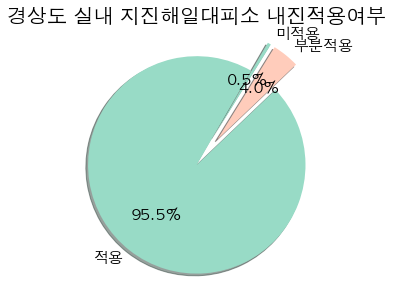

In [94]:
labels=['적용','부분적용','미적용']   #항상 파이그래프 보면서 label순서 제대로 설정했는지 확인 
for_seismic['내진적용여부'].value_counts().plot.pie(labels = labels
                    ,colors= ['#98DBC6', '#FFCCBB'] #색깔 지정 (색깔 코드 인터넷 검색)
                    ,startangle = 60                #시작 각도 설정
                    ,shadow = True                  #그림자 생성
                    ,autopct = '%1.1f%%'            # 퍼센테이지 소숫점 설정
                    ,explode = (0, 0.3 ,0.3)              # 한 파트 톡 튀어 나오게 만들기 (꼭 파트의 수와 동일해야함 안그럼 오류 EG)4개로 구분되면 (0, 0, 0, 0.1)로 기재)
                    ,figsize=(5, 5)                 # 그래프 사이즈 설정 
                    ,fontsize = 15)                 # 글씨 크기 설정
plt.title('경상도 실내 지진해일대피소 내진적용여부', fontsize=20)   #제목명, 제목 사이즈 설정
pylab.ylabel('')    # y축 설명 없애기 

### 지진해일 대피소 구분 분석

In [95]:
len(shelter_GS[shelter_GS['지진해일대피소구분']=='지진대피소'])

2134

In [96]:
len(shelter_GS[shelter_GS['지진해일대피소구분']=='지진해일대피소'])

642

Text(0, 0.5, '')

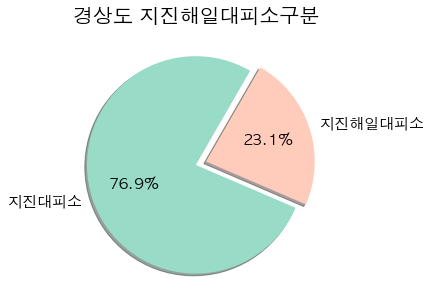

In [97]:
labels=['지진대피소', '지진해일대피소']
shelter_GS['지진해일대피소구분'].value_counts().plot.pie(labels = labels
                    ,colors= ['#98DBC6', '#FFCCBB']
                    ,startangle = 60
                    ,shadow = True
                    ,autopct = '%1.1f%%'
                    ,explode = (0,0.1) 
                    ,figsize=(5, 5)
                    ,fontsize = 15)
plt.title('경상도 지진해일대피소구분', fontsize=20)
pylab.ylabel('')

### 지진해일대피소유형 분석

In [98]:
shelter_GS['지진해일대피소유형'].unique()

array(['옥외대피소', '실내대피소', '지진해일 긴급대피장소'], dtype=object)

In [99]:
print(len(shelter_GS[shelter_GS['지진해일대피소유형']=='옥외대피소']))
print(len(shelter_GS[shelter_GS['지진해일대피소유형']=='실내대피소']))
print(len(shelter_GS[shelter_GS['지진해일대피소유형']=='지진해일 긴급대피장소']))

1978
396
402


Text(0, 0.5, '')

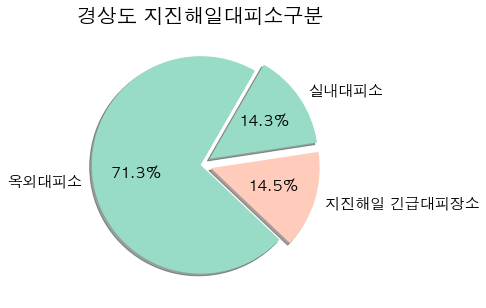

In [100]:
labels=['옥외대피소', '지진해일 긴급대피장소','실내대피소']
shelter_GS['지진해일대피소유형'].value_counts().plot.pie(labels = labels
                    ,colors= ['#98DBC6', '#FFCCBB']
                    ,startangle = 60
                    ,shadow = True
                    ,autopct = '%1.1f%%'
                    ,explode = (0,0.1,0.1) 
                    ,figsize=(5, 5)
                    ,fontsize = 15)
plt.title('경상도 지진해일대피소구분', fontsize=20)
pylab.ylabel('')

### 지진해일대피소유형구분 분석

In [101]:
shelter_GS['지진해일대피소유형구분'].unique()

array(['운동장', '공원', '기타', '학교', '체육관', '공터', '학교운동장'], dtype=object)

In [102]:
len(shelter_GS['지진해일대피소유형구분'])

2776

In [103]:
print(len(shelter_GS[shelter_GS['지진해일대피소유형구분']=='운동장'])/len(shelter_GS['지진해일대피소유형구분'])*100)
print(len(shelter_GS[shelter_GS['지진해일대피소유형구분']=='공원'])/len(shelter_GS['지진해일대피소유형구분'])*100)
print(len(shelter_GS[shelter_GS['지진해일대피소유형구분']=='기타'])/len(shelter_GS['지진해일대피소유형구분'])*100)
print(len(shelter_GS[shelter_GS['지진해일대피소유형구분']=='학교'])/len(shelter_GS['지진해일대피소유형구분'])*100)
print(len(shelter_GS[shelter_GS['지진해일대피소유형구분']=='체육관'])/len(shelter_GS['지진해일대피소유형구분'])*100)
print(len(shelter_GS[shelter_GS['지진해일대피소유형구분']=='공터'])/len(shelter_GS['지진해일대피소유형구분'])*100)
print(len(shelter_GS[shelter_GS['지진해일대피소유형구분']=='학교운동장'])/len(shelter_GS['지진해일대피소유형구분'])*100)

40.85014409221902
9.906340057636887
12.17579250720461
21.397694524495677
1.9812680115273775
10.806916426512968
2.881844380403458


Text(0, 0.5, '')

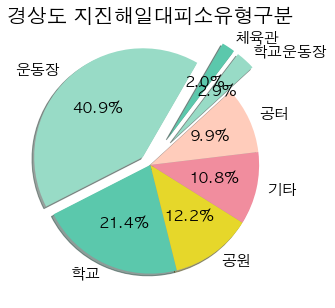

In [104]:
labels=['운동장', '학교', '공원', '기타', '공터','학교운동장','체육관']
shelter_GS['지진해일대피소유형구분'].value_counts().plot.pie(labels = labels
                    ,colors= ['#98DBC6','#5BC8AC','#E6D72A','#F18D9E', '#FFCCBB']
                    ,startangle = 60
                    ,shadow = True
                    ,autopct = '%1.1f%%'
                    ,explode = (0.1,0,0,0,0,0.3,0.3) 
                    ,figsize=(5, 5)
                    ,fontsize = 15)
plt.title('경상도 지진해일대피소유형구분', fontsize=20)
pylab.ylabel('')

### 지진해일대피소운영상태 분석

In [105]:
shelter_GS['지진해일대피소운영상태'].unique()

array(['Y', 'N'], dtype=object)

Text(0, 0.5, '')

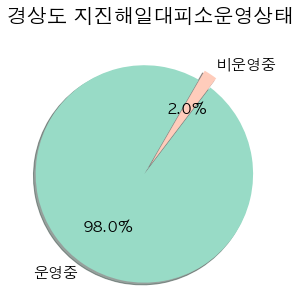

In [106]:
labels=['운영중', '비운영중']
shelter_GS['지진해일대피소운영상태'].value_counts().plot.pie(labels = labels
                    ,colors= ['#98DBC6', '#FFCCBB']
                    ,startangle = 60
                    ,shadow = True
                    ,autopct = '%1.1f%%'
                    ,explode = (0.1,0) 
                    ,figsize=(5, 5)
                    ,fontsize = 15)
plt.title('경상도 지진해일대피소운영상태', fontsize=20)
pylab.ylabel('')

### 경상도 지역 분석

In [107]:
shelter_GS['area'].unique()

array(['경상남도', '경상북도', '부산광역시', '대구광역시'], dtype=object)

In [108]:
print(len(shelter_GS[shelter_GS['area']=='부산광역시']))
print(len(shelter_GS[shelter_GS['area']=='대구광역시']))
print(len(shelter_GS[shelter_GS['area']=='경상남도']))
print(len(shelter_GS[shelter_GS['area']=='경상북도']))

264
606
669
1237


Text(0, 0.5, '')

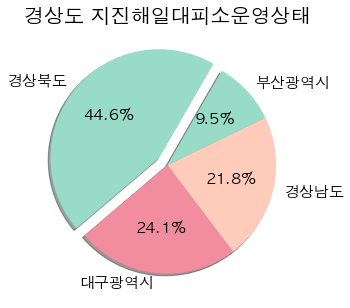

In [109]:
labels=['경상북도', '대구광역시', '경상남도','부산광역시']
shelter_GS['area'].value_counts().plot.pie(labels = labels
                    ,colors= ['#98DBC6','#F18D9E', '#FFCCBB']
                    ,startangle = 60
                    ,shadow = True
                    ,autopct = '%1.1f%%' 
                    ,explode = (0.1,0, 0,0) 
                    ,figsize=(5, 5)
                    ,fontsize = 15)
plt.title('경상도 지진해일대피소운영상태', fontsize=20)
pylab.ylabel('')

#### 위도, 경도 null value 채우기

In [110]:
nulls = shelter_GS[shelter_GS['위도'].isnull()]

In [111]:
pd.DataFrame(shelter_GS.isnull().sum())

,0
지진해일대피소명,0
지진해일대피소구분,0
지진해일대피소유형,0
지진해일대피소유형구분,0
소재지도로명주소,0
소재지지번주소,1528
위도,6
경도,6
수용가능면적,0
최대수용인원수,0


In [112]:
import os 
import requests

In [113]:
LOCATIONIQ_TOKEN = os.environ['LOCATIONIQ_TOKEN']

In [114]:
def gc(address):
    url = 'https://us1.locationiq.com/v1/search.php'
    payload = {
        'key': LOCATIONIQ_TOKEN,
        'q': address,
        'format': 'json'
    }
    response = requests.get(url, params=payload)
    results = response.json()
    if 'error' in results:
        return None, None
    coordinates = results[0]
    return coordinates['lat'], coordinates['lon']

In [115]:
lats = []
lngs = []

for i, index in enumerate(nulls.index):
    print(i + 1, '-', index)
    lat, lng = gc(nulls['소재지도로명주소'][index])
    lats.append(lat or 0)
    lngs.append(lng or 0)

nulls = nulls.assign(위=lats, 경=lngs)

nulls.head()

1 - 937
2 - 939
3 - 1833
4 - 1841
5 - 5345
6 - 6050


,지진해일대피소명,지진해일대피소구분,지진해일대피소유형,지진해일대피소유형구분,소재지도로명주소,소재지지번주소,위도,경도,수용가능면적,최대수용인원수,지진해일대피소운영상태,지진해일대피소전화번호,부대편의시설,주민대피지구명,주민대피지구내가구수,주민대피지구내거주인수,주민대피지구내재해약자수,내진적용여부,내진설계등급,해안선이격거리,해발높이,지진대피안내표지판수,긴급대피장소안내표지판수,지진대피로안내표지판수,관리기관명,관리기관전화번호,데이터기준일자,제공기관코드,제공기관명,area,위,경
937,부흥2리 뒷산,지진해일대피소,옥외대피소,공원,경상북도 영덕군 남정면 부흥2리,NaN,NaN,NaN,1250.0,250.0,Y,054-730-6612,NaN,장사지구,NaN,NaN,NaN,미적용,NaN,NaN,NaN,NaN,NaN,NaN,경상북도 영덕군청,NaN,2018-08-30,5180000,경상북도 영덕군,경상북도,0,0
939,경보휴게소,지진해일대피소,옥외대피소,공원,경상북도 영덕군 남정면 원척리 297-9,NaN,NaN,NaN,1500.0,300.0,Y,054-730-6614,NaN,원척지구,NaN,NaN,NaN,미적용,NaN,NaN,NaN,NaN,NaN,NaN,경상북도 영덕군청,NaN,2018-08-30,5180000,경상북도 영덕군,경상북도,36.30522,129.36901
1833,군민운동장,지진대피소,옥외대피소,기타,대구광역시 달성군 논공읍 논공로 1-109,NaN,NaN,NaN,31622.0,9582.0,Y,053-614-3521,NaN,별도 지구지정사항 없음,NaN,NaN,NaN,미적용,NaN,NaN,NaN,NaN,NaN,NaN,대구광역시 달성군청,NaN,2019-06-25,3480000,대구광역시 달성군,대구광역시,35.725001,128.4556612
1841,하리 임시주차장,지진대피소,옥외대피소,기타,대구광역시 달성군 현풍면 하리 253-2,NaN,NaN,NaN,4704.0,1425.0,Y,053-668-5708,NaN,별도 지구지정사항 없음,NaN,NaN,NaN,미적용,NaN,NaN,NaN,NaN,NaN,NaN,대구광역시 달성군청,NaN,2019-06-25,3480000,대구광역시 달성군,대구광역시,0,0
5345,상주초등학교 운동장,지진대피소,옥외대피소,운동장,경상북도 상주시 서문동 131-6,NaN,NaN,NaN,1601.0,485.0,Y,054-534-8711,NaN,별도 지구지정사항 없음,NaN,NaN,NaN,미적용,NaN,NaN,NaN,NaN,NaN,NaN,상주초등학교,NaN,2019-05-27,5110000,경상북도 상주시,경상북도,36.4173245,128.1562144


In [125]:
shelter_GS = shelter_GS.merge(nulls, how='inner', on='지진해일대피소명')

In [126]:
len(shelter_GS)

8

In [127]:
shelter_GS.head()

,지진해일대피소명,지진해일대피소구분_x,지진해일대피소유형_x,지진해일대피소유형구분_x,소재지도로명주소_x,소재지지번주소_x,위도_x,경도_x,수용가능면적_x,최대수용인원수_x,지진해일대피소운영상태_x,지진해일대피소전화번호_x,부대편의시설_x,주민대피지구명_x,주민대피지구내가구수_x,주민대피지구내거주인수_x,주민대피지구내재해약자수_x,내진적용여부_x,내진설계등급_x,해안선이격거리_x,해발높이_x,지진대피안내표지판수_x,긴급대피장소안내표지판수_x,지진대피로안내표지판수_x,관리기관명_x,관리기관전화번호_x,데이터기준일자_x,제공기관코드_x,제공기관명_x,area_x,지진해일대피소구분_y,지진해일대피소유형_y,지진해일대피소유형구분_y,소재지도로명주소_y,소재지지번주소_y,위도_y,경도_y,수용가능면적_y,최대수용인원수_y,지진해일대피소운영상태_y,지진해일대피소전화번호_y,부대편의시설_y,주민대피지구명_y,주민대피지구내가구수_y,주민대피지구내거주인수_y,주민대피지구내재해약자수_y,내진적용여부_y,내진설계등급_y,해안선이격거리_y,해발높이_y,지진대피안내표지판수_y,긴급대피장소안내표지판수_y,지진대피로안내표지판수_y,관리기관명_y,관리기관전화번호_y,데이터기준일자_y,제공기관코드_y,제공기관명_y,area_y,위,경
0,부흥2리 뒷산,지진해일대피소,옥외대피소,공원,경상북도 영덕군 남정면 부흥2리,NaN,NaN,NaN,1250.0,250.0,Y,054-730-6612,NaN,장사지구,NaN,NaN,NaN,미적용,NaN,NaN,NaN,NaN,NaN,NaN,경상북도 영덕군청,NaN,2018-08-30,5180000,경상북도 영덕군,경상북도,지진해일대피소,옥외대피소,공원,경상북도 영덕군 남정면 부흥2리,NaN,NaN,NaN,1250.0,250.0,Y,054-730-6612,NaN,장사지구,NaN,NaN,NaN,미적용,NaN,NaN,NaN,NaN,NaN,NaN,경상북도 영덕군청,NaN,2018-08-30,5180000,경상북도 영덕군,경상북도,0,0
1,부흥2리 뒷산,지진해일대피소,지진해일 긴급대피장소,공터,경상북도 영덕군 남정면 장사리,경상북도 영덕군 남정면 장사리,36.283620,129.370855,825.0,250.0,Y,054-730-6521,NaN,장사지구,NaN,NaN,NaN,미적용,NaN,900.0,30.0,NaN,NaN,NaN,영덕군,054-730-6521,2019-06-30,1741000,행정안전부,경상북도,지진해일대피소,옥외대피소,공원,경상북도 영덕군 남정면 부흥2리,NaN,NaN,NaN,1250.0,250.0,Y,054-730-6612,NaN,장사지구,NaN,NaN,NaN,미적용,NaN,NaN,NaN,NaN,NaN,NaN,경상북도 영덕군청,NaN,2018-08-30,5180000,경상북도 영덕군,경상북도,0,0
2,경보휴게소,지진해일대피소,옥외대피소,공원,경상북도 영덕군 남정면 원척리 297-9,NaN,NaN,NaN,1500.0,300.0,Y,054-730-6614,NaN,원척지구,NaN,NaN,NaN,미적용,NaN,NaN,NaN,NaN,NaN,NaN,경상북도 영덕군청,NaN,2018-08-30,5180000,경상북도 영덕군,경상북도,지진해일대피소,옥외대피소,공원,경상북도 영덕군 남정면 원척리 297-9,NaN,NaN,NaN,1500.0,300.0,Y,054-730-6614,NaN,원척지구,NaN,NaN,NaN,미적용,NaN,NaN,NaN,NaN,NaN,NaN,경상북도 영덕군청,NaN,2018-08-30,5180000,경상북도 영덕군,경상북도,36.30522,129.36901
3,경보휴게소,지진해일대피소,지진해일 긴급대피장소,공터,경상북도 영덕군 남정면 원척리 297-9,경상북도 영덕군 남정면 원척리 297-9,36.296078,129.376547,990.0,300.0,Y,054-730-6521,NaN,원척지구,NaN,NaN,NaN,미적용,NaN,150.0,30.0,NaN,NaN,NaN,영덕군,054-730-6521,2019-06-30,1741000,행정안전부,경상북도,지진해일대피소,옥외대피소,공원,경상북도 영덕군 남정면 원척리 297-9,NaN,NaN,NaN,1500.0,300.0,Y,054-730-6614,NaN,원척지구,NaN,NaN,NaN,미적용,NaN,NaN,NaN,NaN,NaN,NaN,경상북도 영덕군청,NaN,2018-08-30,5180000,경상북도 영덕군,경상북도,36.30522,129.36901
4,군민운동장,지진대피소,옥외대피소,기타,대구광역시 달성군 논공읍 논공로 1-109,NaN,NaN,NaN,31622.0,9582.0,Y,053-614-3521,NaN,별도 지구지정사항 없음,NaN,NaN,NaN,미적용,NaN,NaN,NaN,NaN,NaN,NaN,대구광역시 달성군청,NaN,2019-06-25,3480000,대구광역시 달성군,대구광역시,지진대피소,옥외대피소,기타,대구광역시 달성군 논공읍 논공로 1-109,NaN,NaN,NaN,31622.0,9582.0,Y,053-614-3521,NaN,별도 지구지정사항 없음,NaN,NaN,NaN,미적용,NaN,NaN,NaN,NaN,NaN,NaN,대구광역시 달성군청,NaN,2019-06-25,3480000,대구광역시 달성군,대구광역시,35.725001,128.4556612


In [119]:
shelter_GS.columns

Index(['지진해일대피소명', '지진해일대피소구분_x', '지진해일대피소유형_x', '지진해일대피소유형구분_x', '소재지도로명주소_x',
       '소재지지번주소_x', '위도_x', '경도_x', '수용가능면적_x', '최대수용인원수_x', '지진해일대피소운영상태_x',
       '지진해일대피소전화번호_x', '부대편의시설_x', '주민대피지구명_x', '주민대피지구내가구수_x',
       '주민대피지구내거주인수_x', '주민대피지구내재해약자수_x', '내진적용여부_x', '내진설계등급_x', '해안선이격거리_x',
       '해발높이_x', '지진대피안내표지판수_x', '긴급대피장소안내표지판수_x', '지진대피로안내표지판수_x', '관리기관명_x',
       '관리기관전화번호_x', '데이터기준일자_x', '제공기관코드_x', '제공기관명_x', 'area_x',
       '지진해일대피소구분_y', '지진해일대피소유형_y', '지진해일대피소유형구분_y', '소재지도로명주소_y',
       '소재지지번주소_y', '위도_y', '경도_y', '수용가능면적_y', '최대수용인원수_y', '지진해일대피소운영상태_y',
       '지진해일대피소전화번호_y', '부대편의시설_y', '주민대피지구명_y', '주민대피지구내가구수_y',
       '주민대피지구내거주인수_y', '주민대피지구내재해약자수_y', '내진적용여부_y', '내진설계등급_y', '해안선이격거리_y',
       '해발높이_y', '지진대피안내표지판수_y', '긴급대피장소안내표지판수_y', '지진대피로안내표지판수_y', '관리기관명_y',
       '관리기관전화번호_y', '데이터기준일자_y', '제공기관코드_y', '제공기관명_y', 'area_y', '위', '경'],
      dtype='object')

In [120]:
shelter_GS['위도'] = shelter_GS['위도'].fillna(shelter_GS['위'])

KeyError: '위도'

In [ ]:
shelter_GS['경도'] = shelter_GS['경도'].fillna(shelter_GS['경'])

## 부산 지도

In [ ]:
shelter_GS.columns

In [ ]:
shelter_busan= shelter_GS[shelter_GS['area']=='부산광역시'].drop(columns=['지진해일대피소구분', '지진해일대피소유형', '지진해일대피소유형구분', '소재지도로명주소',
       '소재지지번주소', '수용가능면적', '최대수용인원수', '지진해일대피소운영상태',
       '지진해일대피소전화번호', '부대편의시설', '주민대피지구명', '주민대피지구내가구수', '주민대피지구내거주인수',
       '주민대피지구내재해약자수', '내진적용여부', '내진설계등급', '해안선이격거리', '해발높이', '지진대피안내표지판수',
       '긴급대피장소안내표지판수', '지진대피로안내표지판수', '관리기관명', '관리기관전화번호', '데이터기준일자', '제공기관코드',
       '제공기관명', 'area'])

In [ ]:
map = folium.Map(location=[35.1796, 129.0756], zoom_start = 10, tiles ='Mapbox bright')

In [ ]:
fg = folium.FeatureGroup(name = '부산지진해일대피소')

In [ ]:
for lat, lon, name in zip(shelter_busan['위도'], shelter_busan['경도'], shelter_busan['지진해일대피소명']):
    fg.add_child(folium.Marker(location=[lat, lon], popup=(folium.Popup(name)), icon=folium.Icon(icon = 'cloud', color= 'blue', icon_color = 'white')))

In [ ]:
map.add_child(fg)

In [ ]:
map.save(outfile='부산.html')

In [ ]:
## 다른 방법

In [ ]:
coordinates = shelter_busan[['위도', '경도']]

coordinates

# 위도, 경도만 모음

In [ ]:
import folium
from folium import Map
from folium.plugins import HeatMap

In [ ]:
# 지도 준비

map = Map(location=[35.1796, 129.0756], zoom_start=10)

# 지도에 위치 표시

for lat, lng in coordinates.values:
    marker = folium.Circle(
        location=[lat, lng],
        radius=1_000,
        weight=1,
        fill_color='#F00',
        fill_opacity=0.3,
    )
    marker.add_to(map)

map

In [ ]:
map.save(outfile='부산지도.html')

In [ ]:
# 지도 준비

map = Map(location=[35.1796, 129.0756], zoom_start=10)

# 히트맵 표시

HeatMap(data=coordinates, radius=20).add_to(map)

map

In [ ]:
map.save(outfile='부산히트맵.html')